In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy import stats
from scipy.stats import chi2_contingency, ks_2samp, loguniform
from sklearn.metrics import matthews_corrcoef
import warnings
warnings.filterwarnings("ignore")
import random
import matplotlib.ticker as tkr
#from imblearn.over_sampling import SMOTENC
#from optbinning import BinningProcess

#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RandomizedSearchCV
#from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
#from sklearn.feature_selection import RFECV
#from xgboost import XGBClassifier

<H1> Úvod <H1>

Cílem tohoto projektu je předzpracovat poskytnutý datový soubor a následně vytvořit model, jehož úkolem bude
predikovat výsledky pro daný business case.

Náš projekt bude provádeň v souladu s metodikou CRISP-DM(Cross Industry Standard Processfor Data Mining), což je  
procesní model, který slouží jako základ pro procesy data science a skláda se ze šesti kroků: Business porozumění, porozumění datům, příprava dat, modelování, hodnocení modelu a deployment.

V rámco tohoto projektu budeme pro jednotlivé úkoly využívat jeden nástroj - programovací jazyk Python, a to jak pro přípravu dat, tak i následné modelování.Python je open source, objektově orientovaný, vysokoúrovňový programovací jazyk. Je široce používán díky své snadno pochopitelné a naučitelné syntaxi (což vede ke snížení nákladů na údržbu programu). Dále podporuje nekonečnou řadu modulů a balíčků (Python Software Foundation, 2019). To platí zejména pro knihovny v oblasti data science. Nejběžnější jsou: NumPy, Pandas, Matplotlib, SciPy nebo Scikit-learn (GeeksforGeeks, 2022), které budeme i v našem projektu používat.


In [ ]:
# load data from git
dataset = pd.read_csv('https://raw.githubusercontent.com/Doll03/4IZ480/main/Data/TimeDeposit_10K.csv', sep=";")


: 

<H1> Popis problému <H1>

Před zahajením kontroly dat a exploratorní analýzy je potřeba porozumět a definovat cíl našeho business case-u.Tento krok je nezbytný a povinný pro jakýkoli projekt data miningu. Obvykle zahrnuje identifikaci a popis základních cílů projektu z obchodního hlediska a poté stanovení souboru projektových cílů a požadavků, které se používají k vypracování plánu projektu.

Vzhledem k tomu, že se tento soubor dat týká bankovní instituce a jejích zákazníků, chceme tím pádem vytvořit model, který bude predikovat, zda si zákazník založí nový termínovaný vklad.
S pomocí daného modelu může bankovní instituce nejen snížit své náklady na to, aby se vyhnula zacílení na nekorektní klienty, ale také zvýšit své zisky díky zacílení na ty relevantní. Jinými slovy, chtěli bychom klienty klasifikovat podle pravděpodobnosti otevření nového termínovaného vkladu a na základě toho může bankovní ústav upravit svou obchodní strategii a vztahy se zákazníky.

<H1>Porozumění datům<H1>

Tento krok se může skládat ze tří dílčích kroků – sběr dat, popis dat a exploratorní analýza dat. S ohledem na sběr dat byl tento dataset poskytnut profesoreme kurzu ve formátu csv spolu s popisem datasetu. Poskytnutý datový soubor obsahuje 46 sloupců a 10 000 řádků, kde každý řádek představuje jeden zákazník dané banky s informacemi uvedenými ve sloupcích. Tato datová sada obsahuje zejména demografické informace zákazníků (jako je pohlaví, rodinný stav, věk), finanční informace (příjem, zůstatky) a transakční informace (počet transakcí, částky transakcí). Další informace naleznete v tabulce 1, která popisuje všechny sloupce. Upozorňujeme, že všechny zůstatky, čísla transakcí a částky jsou vypočteny za posledních 6 měsíců.

F    0.9897
T    0.0103
Name: Time_Deposits_Flag, dtype: float64


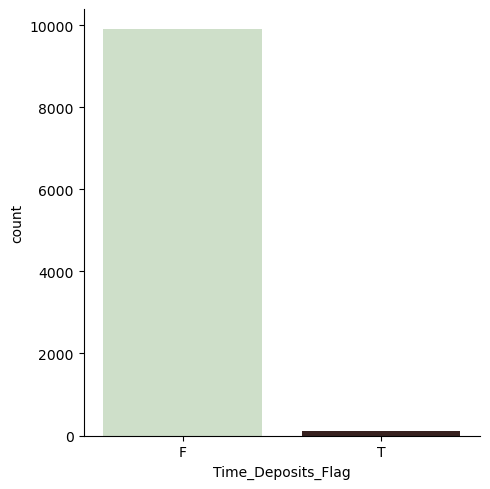

In [4]:
# show histogram of target variable
print(dataset["Time_Deposits_Flag"].value_counts(normalize=True))
sns.catplot(data = dataset, x = "Time_Deposits_Flag", kind = "count", palette = "ch:.79")
plt.show()

In [5]:
#change of features datatypes 
dataset["Customer_ID"] = dataset["Customer_ID"].astype("object")
dataset["Birth_Date"] = dataset["Birth_Date"].astype("datetime64")
dataset["Ref_Date"] = dataset["Ref_Date"].astype("datetime64")
dataset["Gender"] = dataset["Gender"].astype("category")
dataset["Marital_Status"] = dataset["Marital_Status"].astype("category")
dataset["Children_Num"] = dataset["Children_Num"].astype("category")
dataset["Occupation_Category"] = dataset["Occupation_Category"].astype("category")
dataset["Payroll_Flag"] = dataset["Payroll_Flag"].astype("bool")
dataset["Business_Flag"] = dataset["Business_Flag"].astype("bool")
dataset["Saving_Current_Accounts_Flag"] = dataset["Saving_Current_Accounts_Flag"].astype("bool")
dataset["Investment_Products_Flag"] = dataset["Investment_Products_Flag"].astype("bool")
dataset["Insurance_Products_Flag"] = dataset["Insurance_Products_Flag"].astype("bool")
dataset["Business_Loans_Flag"] = dataset["Business_Loans_Flag"].astype("bool")
dataset["Housing_Loans_Flag"] = dataset["Housing_Loans_Flag"].astype("bool")
dataset["Consumer_Loans_Flag"] = dataset["Consumer_Loans_Flag"].astype("bool")
dataset["Credit_Cards_Flag"] = dataset["Credit_Cards_Flag"].astype("bool")
dataset["Time_Deposits_Flag"] = [True if i == "T" else False for i in dataset['Time_Deposits_Flag']]



In [6]:
dataset.Time_Deposits_Flag.value_counts()


False    9897
True      103
Name: Time_Deposits_Flag, dtype: int64

In [6]:
#Creating boolean features 
dataset["Credit_Cards_Installments_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Installments']]
dataset["Credit_Cards_Payments_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Payments_Num']]
dataset["Credit_Cards_Purchases_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Purchases_Num']]
dataset["Credit_Cards_Witrhdrawals_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Witrhdrawals_Num']]
dataset["Internet_Trans_Flag"] = [True if i > 0 else False for i in dataset['Internet_Trans_Num']]
dataset["Deposit_Trans_Flag"] = [True if i > 0 else False for i in dataset['Deposit_Trans_Num']]
dataset["Payment_Trans_Flag"] = [True if i > 0 else False for i in dataset['Payment_Trans_Num']]
dataset["Transfer_Trans_Flag"] = [True if i > 0 else False for i in dataset['Transfer_Trans_Num']]
dataset["Withdrawl_Trans_Flag"] = [True if i > 0 else False for i in dataset['Withdrawl_Trans_Num']]

In [7]:
#Creating feature Age_Cat
dataset['Age'] = dataset['Ref_Date'].dt.year - dataset['Birth_Date'].dt.year
Age_Cat = pd.cut(dataset['Age'], bins=[0, 32.50, 51.50, 60.50, 150],labels=['Younger', 'LowerMid', 'UpperMid', 'Older'])
Age_Cat

0       LowerMid
1       LowerMid
2       UpperMid
3       UpperMid
4       LowerMid
          ...   
9995     Younger
9996    LowerMid
9997    LowerMid
9998    LowerMid
9999     Younger
Name: Age, Length: 10000, dtype: category
Categories (4, object): ['Younger' < 'LowerMid' < 'UpperMid' < 'Older']

In [8]:
#change of target datatype
dataset['Time_Deposits_Flag']=dataset['Time_Deposits_Flag'].astype('category')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Customer_ID                       10000 non-null  object        
 1   Gender                            10000 non-null  category      
 2   Birth_Date                        10000 non-null  datetime64[ns]
 3   Ref_Date                          10000 non-null  datetime64[ns]
 4   Marital_Status                    10000 non-null  category      
 5   Children_Num                      10000 non-null  category      
 6   Occupation_Category               10000 non-null  category      
 7   Total_Income                      10000 non-null  float64       
 8   Payroll_Flag                      10000 non-null  bool          
 9   Business_Flag                     10000 non-null  bool          
 10  Saving_Current_Accounts_Flag      10000 non-nul

In [9]:
# dropping unnecessary variables
dataset = dataset.drop(["Ref_Date","Birth_Date","Customer_ID","Age" ], axis = "columns", errors="ignore")

In [10]:
#crealing list of categorical features
cat_v_list = [i for i in list(dataset.columns) if (dataset[i].dtypes in ['O', 'bool', "category"])]
cat_v_list.remove('Time_Deposits_Flag')

#creating list of numerical features
num_v_list = [i for i in list(dataset.columns) if i not in cat_v_list]
num_v_list.remove('Time_Deposits_Flag')
print("Num:", num_v_list, "end=", "Cat:", cat_v_list)


Num: ['Total_Income', 'Saving_Current_Balance', 'Investment_Products_Balance', 'Insurance_Balances', 'Business_Loans_Balance', 'Housing_Loans_Balance', 'Consumer_Loans_Balance', 'Credit_Cards_Balance', 'Branch_Trans_Num', 'ATM_Trans_Num', 'APS_Trans_Num', 'Phone_Trans_Num', 'Internet_Trans_Num', 'Deposit_Trans_Num', 'Withdrawl_Trans_Num', 'Payment_Trans_Num', 'Transfer_Trans_Num', 'Deposit_Trans_Amount', 'Withdrawl_Trans_Amount', 'Payment_Trans_Amount', 'Transfer_Trans_Amount', 'Credit_Cards_Installments', 'Credit_Cards_Payments_Num', 'Credit_Cards_Purchases_Num', 'Credit_Cards_Witrhdrawals_Num', 'Credit_Cards_Payments_Amount', 'Credit_Cards_Purchases_Amount', 'Credit_Cards_Witrhdrawals_Amount', 'Arrears_Months_Max'] end= Cat: ['Gender', 'Marital_Status', 'Children_Num', 'Occupation_Category', 'Payroll_Flag', 'Business_Flag', 'Saving_Current_Accounts_Flag', 'Investment_Products_Flag', 'Insurance_Products_Flag', 'Business_Loans_Flag', 'Housing_Loans_Flag', 'Consumer_Loans_Flag', 'Credit

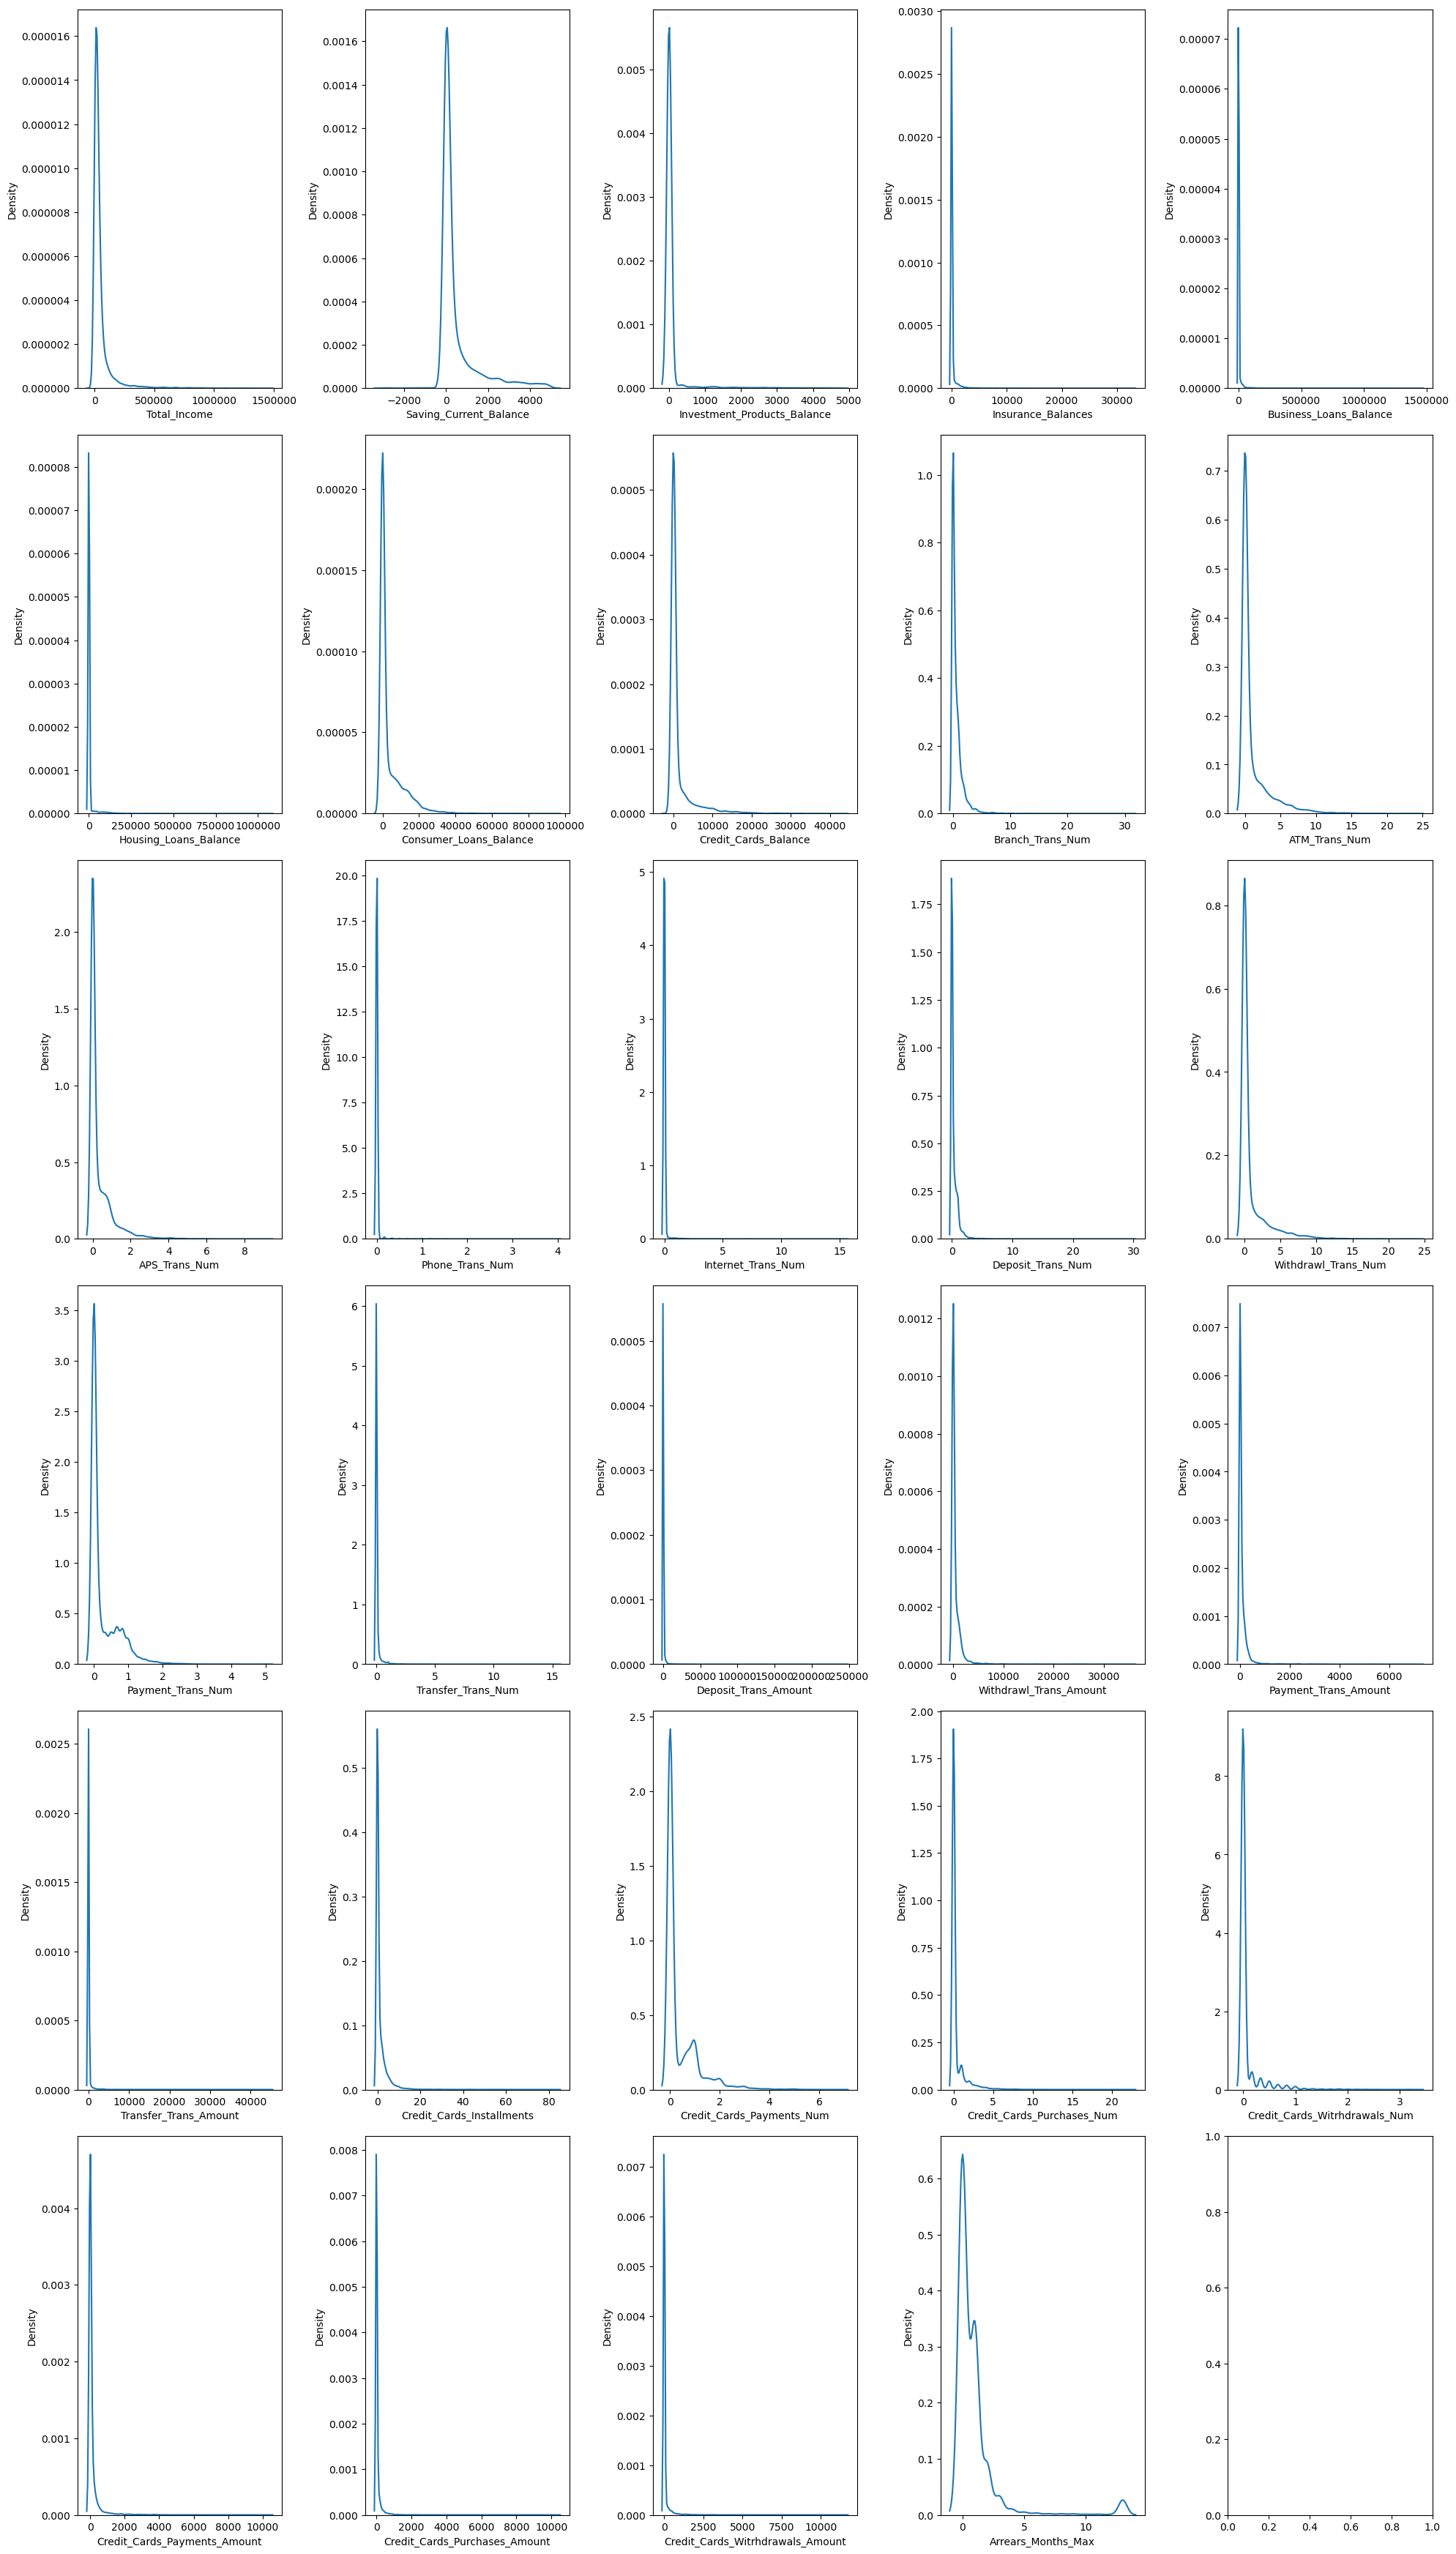

In [23]:
fig, axs = plt.subplots(6,5, figsize = (20, 35))
for i, ax in zip(num_v_list, axs.ravel()):

        sns.kdeplot(data = dataset, x = i ,ax = ax)
        ax.ticklabel_format(style = "plain", axis= "x")
        ax.ticklabel_format(style = "plain", axis= "y")

plt.tight_layout()
plt.show()        

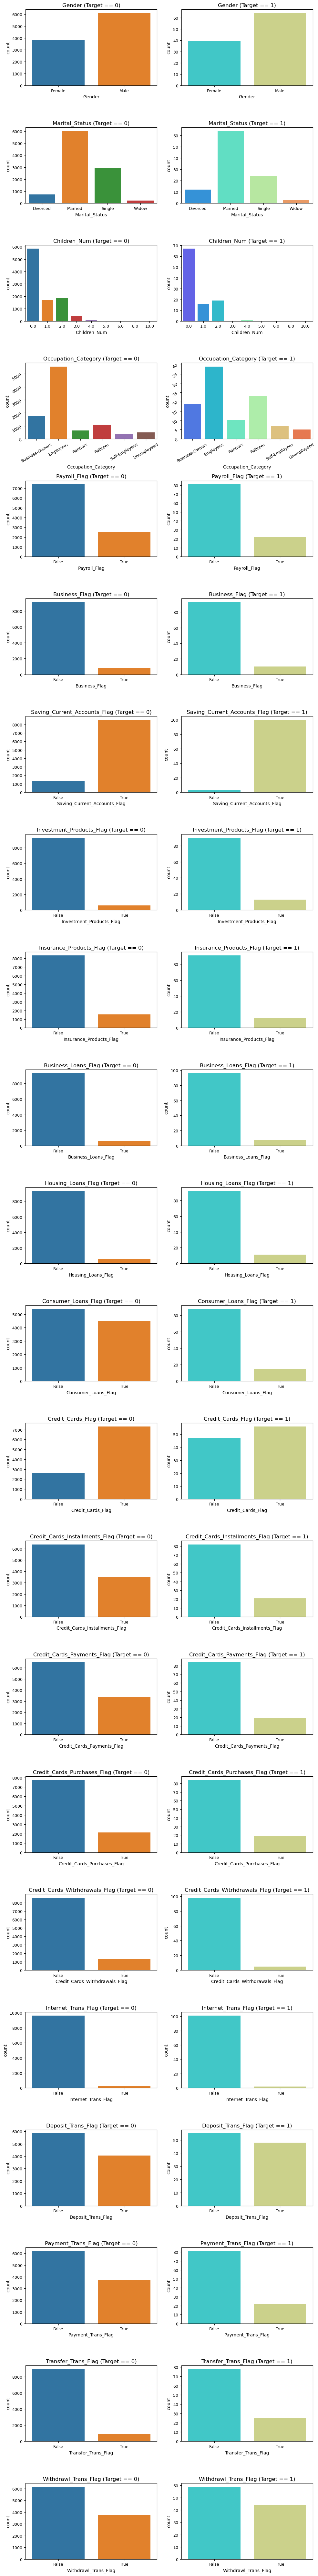

In [12]:
#Creating  graphs for categorical features.


figure,axis = plt.subplots(22,2, figsize=(10,80))

col_ind=0
axis_count = 0

for ax in axis.ravel():

    if axis_count % 2 == 0:
        sns.countplot(data=dataset[dataset["Time_Deposits_Flag"] == False], x=cat_v_list[col_ind], ax = ax)
        ax.set_title(cat_v_list[col_ind]+" (Target == 0)")

        if cat_v_list[col_ind] == "Occupation_Category":
            ax.tick_params(axis='both', which='major', labelsize=9, rotation = 30)
        else:
            ax.tick_params(axis='both', which='major', labelsize=9)
        
    else:
        sns.countplot(data=dataset[dataset["Time_Deposits_Flag"] == True], x=cat_v_list[col_ind], ax = ax, palette='rainbow')
        ax.set_title(cat_v_list[col_ind]+" (Target == 1)")

        if cat_v_list[col_ind] == "Occupation_Category":
            ax.tick_params(axis='both', which='major', labelsize=9, rotation = 30)
        else:
            ax.tick_params(axis='both', which='major', labelsize=9)

        col_ind += 1
        
    axis_count +=1

plt.tight_layout()
plt.show()

In [13]:
list(dataset[cat_v_list].describe().transpose().index)

['Gender',
 'Marital_Status',
 'Children_Num',
 'Occupation_Category',
 'Payroll_Flag',
 'Business_Flag',
 'Saving_Current_Accounts_Flag',
 'Investment_Products_Flag',
 'Insurance_Products_Flag',
 'Business_Loans_Flag',
 'Housing_Loans_Flag',
 'Consumer_Loans_Flag',
 'Credit_Cards_Flag',
 'Credit_Cards_Installments_Flag',
 'Credit_Cards_Payments_Flag',
 'Credit_Cards_Purchases_Flag',
 'Credit_Cards_Witrhdrawals_Flag',
 'Internet_Trans_Flag',
 'Deposit_Trans_Flag',
 'Payment_Trans_Flag',
 'Transfer_Trans_Flag',
 'Withdrawl_Trans_Flag']

In [14]:
# creating contingency table for categorical features

cat_vars = list(dataset[cat_v_list].describe().transpose().index)+["Time_Deposits_Flag"]

for i in cat_vars:
    dataset[i] = dataset[i].astype("category")
cat_corr_mat = pd.DataFrame(columns = cat_vars, index = cat_vars)

for row in cat_corr_mat.index:
    for col in cat_corr_mat.columns:
        if (dataset[row].nunique() == 2) and ((dataset[col].nunique() == 2)):
            try:
                bin_var1 = dataset[col].astype("int")
            except:
                bin_var1 = [True if i == dataset[col].unique()[0] else False for i in dataset[col]]
            try:
               bin_var2 = dataset[row].astype("int")
            except:
                bin_var2 = [True if i == dataset[row].unique()[0] else False for i in dataset[row]]
            phi = matthews_corrcoef(bin_var1, bin_var2)
            cat_corr_mat.loc[row, col] = phi
        elif (dataset[row].nunique() > 2) or ((dataset[col].nunique() > 2)):
            data_crosstab = pd.crosstab(dataset[row], dataset[col])
            chi2, _, ___, ____ = chi2_contingency(data_crosstab, correction=False)
            cramer = np.sqrt(chi2/data_crosstab.sum().sum())/ (min(data_crosstab.shape) -1)
            cat_corr_mat.loc[row, col] = cramer
cat_corr_mat

,Gender,Marital_Status,Children_Num,Occupation_Category,Payroll_Flag,Business_Flag,Saving_Current_Accounts_Flag,Investment_Products_Flag,Insurance_Products_Flag,Business_Loans_Flag,...,Credit_Cards_Installments_Flag,Credit_Cards_Payments_Flag,Credit_Cards_Purchases_Flag,Credit_Cards_Witrhdrawals_Flag,Internet_Trans_Flag,Deposit_Trans_Flag,Payment_Trans_Flag,Transfer_Trans_Flag,Withdrawl_Trans_Flag,Time_Deposits_Flag
Gender,1.0,0.064373,0.052235,0.088933,-0.087323,0.068738,0.044005,-0.022863,0.016285,0.078136,...,-0.013426,-0.012614,-0.048326,0.032302,0.028005,0.052559,0.034361,0.013492,-0.031664,0.001166
Marital_Status,0.064373,0.57735,0.173188,0.113375,0.114699,0.071486,0.060302,0.062563,0.085872,0.071439,...,0.058731,0.057558,0.044857,0.045673,0.043344,0.041945,0.066488,0.025355,0.087918,0.020579
Children_Num,0.052235,0.173188,0.353553,0.048478,0.057933,0.085864,0.021147,0.04967,0.042345,0.086147,...,0.01945,0.024095,0.022199,0.026121,0.031198,0.036504,0.043598,0.021858,0.046676,0.023089
Occupation_Category,0.088933,0.113375,0.048478,0.447214,0.261287,0.441029,0.038752,0.03605,0.027344,0.367203,...,0.049781,0.04648,0.060642,0.032671,0.052749,0.0962,0.088957,0.084033,0.093773,0.047744
Payroll_Flag,-0.087323,0.114699,0.057933,0.261287,1.0,-0.142585,0.195449,-0.077686,-0.076329,-0.119432,...,-0.008279,-0.011377,0.031625,-0.015285,0.050607,-0.081752,-0.174675,0.066307,0.473583,-0.009047
Business_Flag,0.068738,0.071486,0.085864,0.441029,-0.142585,1.0,0.044922,-0.031689,0.017548,0.819254,...,0.014841,0.016234,0.007118,-0.001109,0.035679,0.197719,0.077114,0.130637,0.041843,0.006882
Saving_Current_Accounts_Flag,0.044005,0.060302,0.021147,0.038752,0.195449,0.044922,1.0,-0.137847,0.003624,0.019021,...,-0.111922,-0.113728,-0.052955,-0.058257,0.044237,0.285265,-0.076845,0.117019,0.260883,0.031567
Investment_Products_Flag,-0.022863,0.062563,0.04967,0.03605,-0.077686,-0.031689,-0.137847,1.0,-0.033754,-0.033247,...,-0.097566,-0.091781,-0.057283,-0.068446,0.016236,-0.07903,-0.113187,0.024982,-0.055134,0.027479
Insurance_Products_Flag,0.016285,0.085872,0.042345,0.027344,-0.076329,0.017548,0.003624,-0.033754,1.0,0.019994,...,0.16751,0.164325,0.103446,0.176589,0.024519,0.142576,0.264598,0.078019,-0.011969,-0.01133
Business_Loans_Flag,0.078136,0.071439,0.086147,0.367203,-0.119432,0.819254,0.019021,-0.033247,0.019994,1.0,...,0.010976,0.013839,0.003071,0.008567,0.019186,0.206965,0.092475,0.101596,0.039682,0.004347


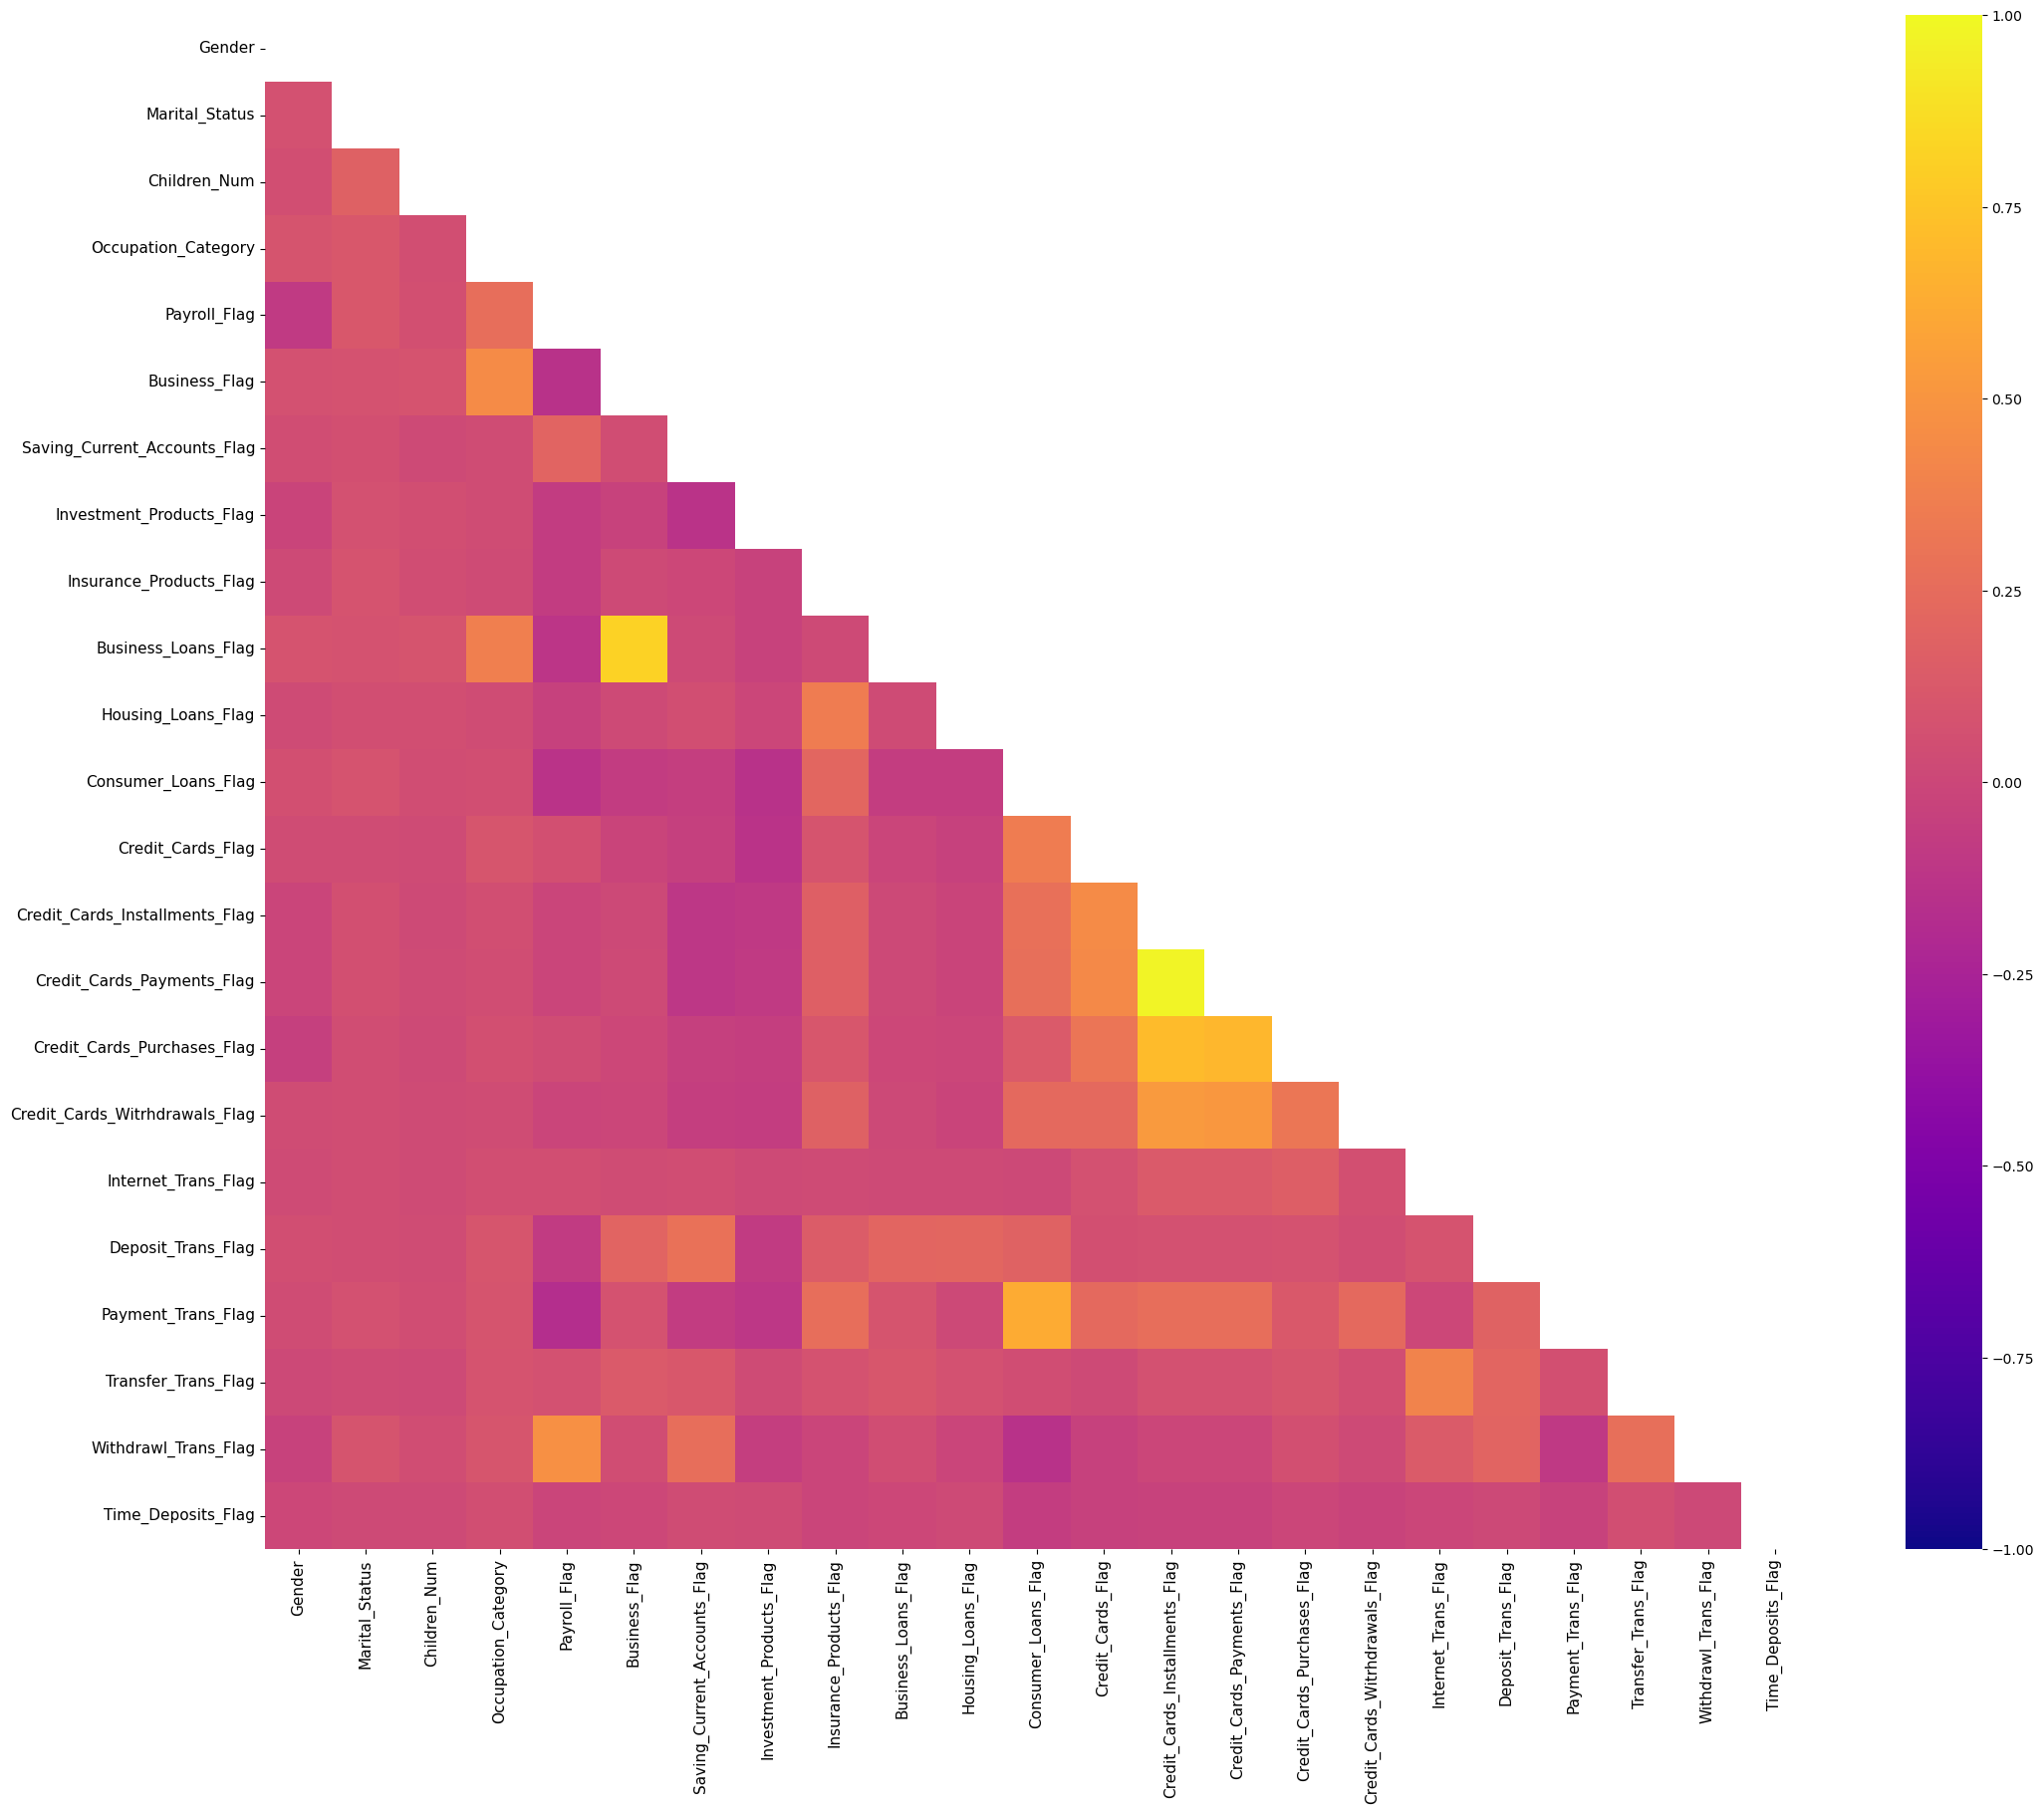

In [15]:
#creating heatmap for category features
cat_corr_mat = cat_corr_mat.astype("float")
plt.figure(figsize = (25, 20))
mask = np.triu(np.ones_like(cat_corr_mat))
cax = sns.heatmap(cat_corr_mat, vmin = -1, vmax = 1, mask = mask, cmap = "plasma")
cax.tick_params(labelsize = 11)
plt.show()


In [16]:
#function for displaying contigency table and chi-square statistic

def chi_square(data, var1, var2 = "Time_Deposits_Flag", alpha = 0.05):


    data_crosstab = pd.crosstab(data[var1],data[var2], margins=True)

    chi2, p, dof, expected = chi2_contingency(data_crosstab, correction=False)

    print('The p-value is', p)
    print(expected)
    if p <= alpha:
        print(f'Result: We reject the null hypothesis: There is a relationship between {var1} and {var2}, therefore they are dependent.')
    else:
        print(f'Result: We fail to reject the null hypothesis: There is no relationship between {var1} and {var2}, therefore they are independent.')
    return data_crosstab

chi_square(dataset, "Gender")

The p-value is 0.9999770029434877
[[ 3802.4274    39.5726  3842.    ]
 [ 6094.5726    63.4274  6158.    ]
 [ 9897.       103.     10000.    ]]
Result: We fail to reject the null hypothesis: There is no relationship between Gender and Time_Deposits_Flag, therefore they are independent.


Time_Deposits_Flag,False,True,All
Gender,,,
Female,3803,39,3842
Male,6094,64,6158
All,9897,103,10000


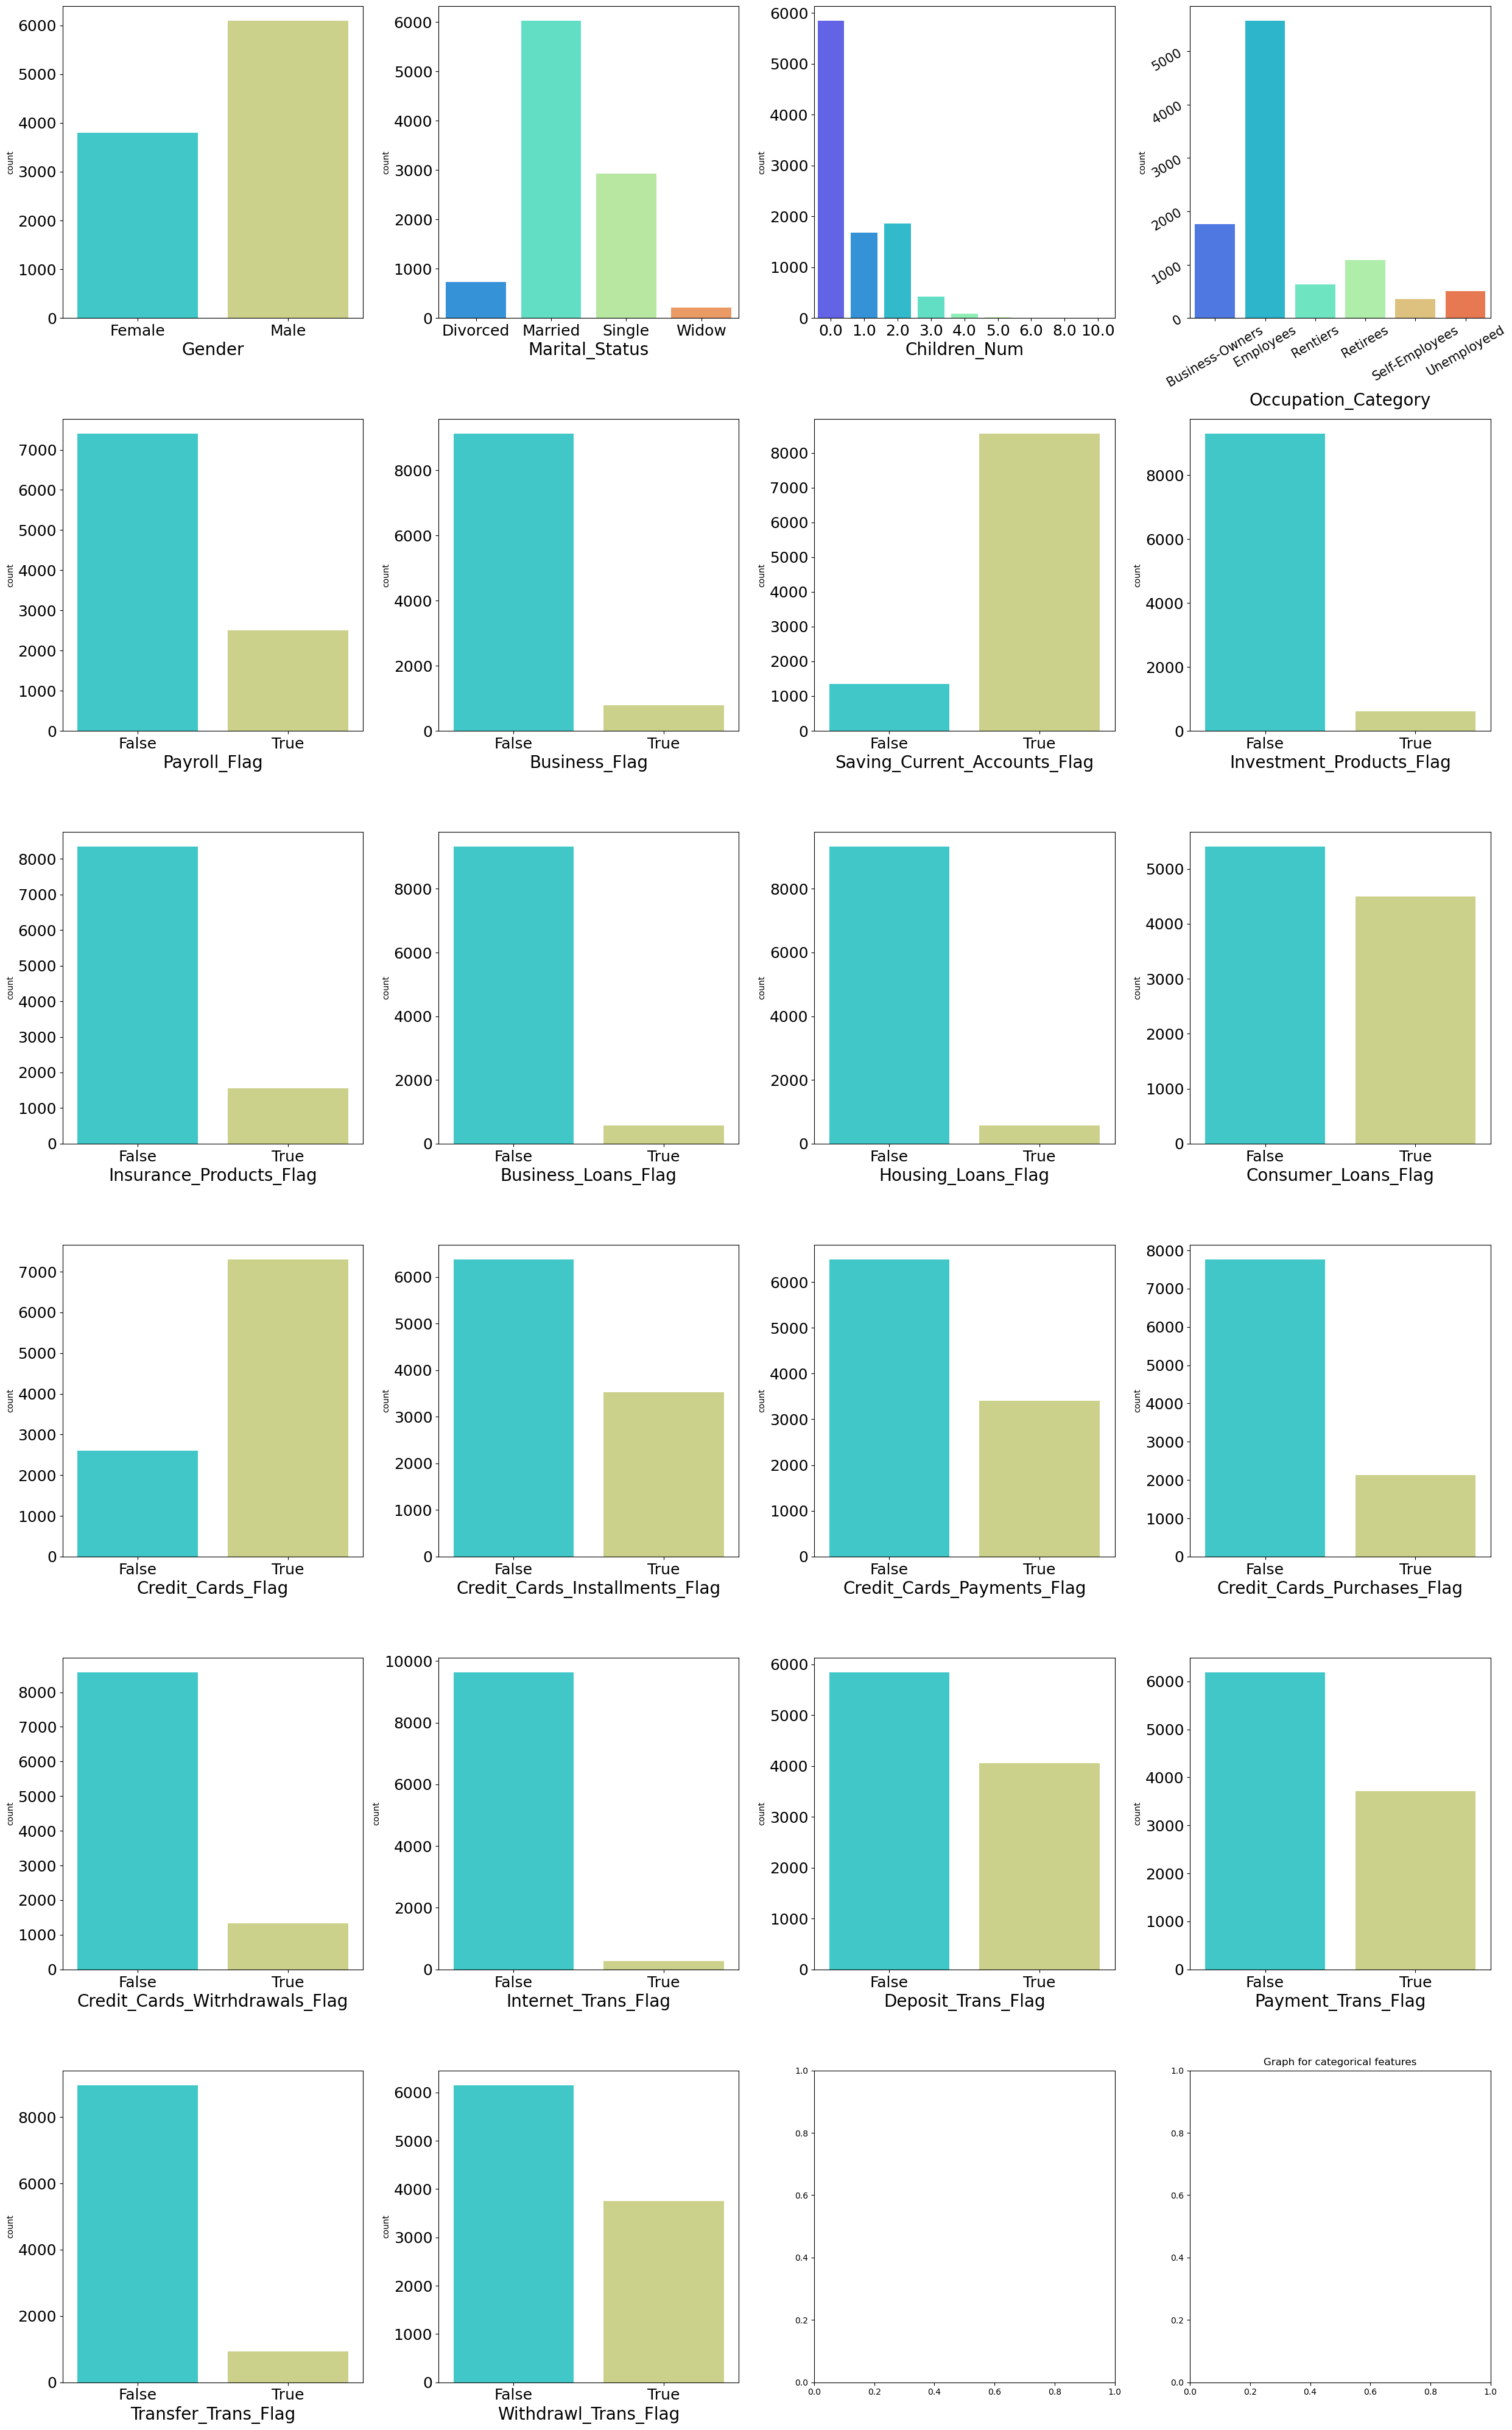

In [17]:
# DELETE THIS kedze to je duplikat 
# #Creating a list and graphs for storing categorical features.
#cat_v_list = [i for i in list(dataset.columns) if i not in num_v_list]
dataset['Time_Deposits_Flag']=dataset['Time_Deposits_Flag'].astype('category')

figure,axis = plt.subplots(6,4, figsize=(25,40))

for column,ax in zip(cat_v_list,axis.ravel()):
    sns.countplot(data=dataset[dataset["Time_Deposits_Flag"] == False], x=column, ax = ax, palette='rainbow')
    if column == "Occupation_Category":
        ax.tick_params(axis='both', which='major', labelsize=15, rotation = 30)
    else:
        ax.tick_params(axis='both', which='major', labelsize=18)
    ax.set_xlabel (column, size = 20) 

plt.title('Graph for categorical features')
plt.tight_layout()
plt.show()

False    0.9897
True     0.0103
Name: Time_Deposits_Flag, dtype: float64


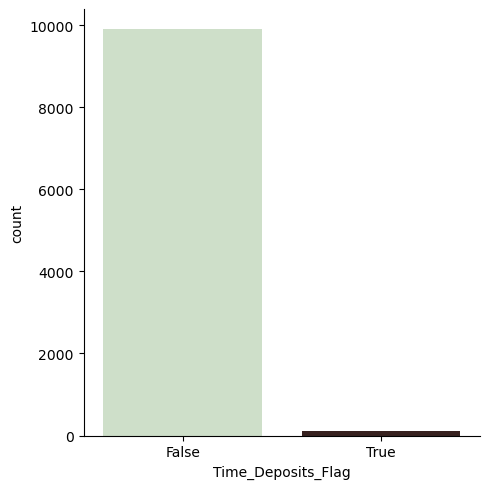

In [18]:
# DELETE DUPLIKAT
print(dataset["Time_Deposits_Flag"].value_counts(normalize=True))
sns.catplot(data = dataset, x = "Time_Deposits_Flag", kind = "count", palette = "ch:.79")
plt.show()

In [19]:
seed = 33

<H1>Data Split<H1>

In [20]:
# dataset division into features and target
target = dataset["Time_Deposits_Flag"]
feature = dataset.drop("Time_Deposits_Flag", axis= 1)

variable_names = list(feature.columns[:])

X = dataset[variable_names]
y = dataset["Time_Deposits_Flag"]

In [21]:
#dataset division into training, testing and validation dataset
_, X_test, __, y_test = train_test_split(X, y, test_size=0.15, random_state = seed, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(_, __, test_size=0.1764, random_state = seed, stratify=__)

In [22]:
#control of equal division into the datasets
print("X_test", X_test.shape[0])
print("y_test", y_test.shape[0])
print("X_train", X_train.shape[0])
print("y_train", y_train.shape[0])
print("X_valid", X_valid.shape[0])
print("y_valid", y_valid.shape[0])


X_test 1500
y_test 1500
X_train 7000
y_train 7000
X_valid 1500
y_valid 1500


<H1>Oversampling<H1>

In [23]:
#zvazovali jsme i underampling ale matematicky to vychazi napicu. Abychom z rozlozeni 99/1 udelali alespon 90/10 stratili bychom 90% pozorování

In [24]:
#column indexing
cat_index = [ind for ind, i in enumerate(X_train.columns) if i in cat_v_list]
cat_index

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 42, 43, 44, 45, 46, 47, 48, 49, 50]

In [25]:
#aby fungoval smotenc musím převst na dataframe a as type integer
y_train = pd.DataFrame(y_train)
y_train = y_train.astype("int")

In [26]:
y_train.value_counts()

Time_Deposits_Flag
0                     6928
1                       72
dtype: int64

In [27]:
#datatype change to objects
for i in cat_v_list:
    X_train[i] = X_train[i].astype("O")

In [76]:
#samotnej oversampling, k-near neighbours is 5 by default
#Synthetic Minority Over-sampling Technique for Nominal and Continuous
smotenc = SMOTENC(random_state=seed, categorical_features=cat_index)
X_respl, y_respl = smotenc.fit_resample(X_train, pd.DataFrame(y_train))

In [29]:
# check of oversampling 
y_respl.value_counts()

Time_Deposits_Flag
0                     6928
1                     6928
dtype: int64

In [30]:
y_respl = y_respl["Time_Deposits_Flag"]

In [31]:
#Defining the binning process
bn = BinningProcess(list(X_respl.columns), categorical_variables = cat_v_list)
bn.fit(X_respl, y_respl)

#Transform
X_train_binned = bn.transform(X_respl, metric="woe")
X_valid_binned = bn.transform(X_valid, metric="woe")
X_test_binned = bn.transform(X_test, metric="woe")

#Storing
woe_bins = pd.DataFrame()
for i in X_train_binned.columns:
    var = bn.get_binned_variable(i).binning_table.build()
    var = var[(~var["Bin"].isin(["Special", "Missing"])) & (~var.index.isin(["Totals"]))]
    var["Variable"] = i
    woe_bins = pd.concat((woe_bins, var))

In [33]:
# list of all the bins
woe_bins

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Variable
0,[Female],4609,0.332636,2637,1972,0.427859,0.290594,0.027893,0.003474,Gender
1,[Male],9247,0.667364,4291,4956,0.535958,-0.144079,0.013830,0.001727,Gender
0,"[Widow, Divorced]",798,0.057592,666,132,0.165414,1.618488,0.124751,0.014088,Marital_Status
1,[Single],3127,0.225678,2059,1068,0.341541,0.656433,0.093898,0.011531,Marital_Status
2,[Married],9931,0.716729,4203,5728,0.576780,-0.309568,0.068142,0.008484,Marital_Status
...,...,...,...,...,...,...,...,...,...,...
1,[False],10841,0.782405,4316,6525,0.601882,-0.413312,0.131785,0.016357,Payment_Trans_Flag
0,[True],926,0.066830,666,260,0.280778,0.940608,0.055122,0.006647,Transfer_Trans_Flag
1,[False],12930,0.933170,6262,6668,0.515700,-0.06282,0.003681,0.000460,Transfer_Trans_Flag
0,[True],4369,0.315315,2619,1750,0.400549,0.403177,0.050572,0.006279,Withdrawl_Trans_Flag


In [34]:
# features where number of bins = 1
list(pd.DataFrame(woe_bins["Variable"].value_counts()).query("Variable==1").index)

['Phone_Trans_Num',
 'Business_Loans_Flag',
 'Investment_Products_Flag',
 'Internet_Trans_Flag',
 'Business_Flag',
 'Internet_Trans_Num']

In [35]:
# dropping features where number of bins = 1 from all datasets
X_train_binned.drop(list(pd.DataFrame(woe_bins["Variable"].value_counts()).query("Variable==1").index), axis = 1, errors = "ignore")
X_valid_binned.drop(list(pd.DataFrame(woe_bins["Variable"].value_counts()).query("Variable==1").index), axis = 1, errors = "ignore")
X_test_binned.drop(list(pd.DataFrame(woe_bins["Variable"].value_counts()).query("Variable==1").index), axis = 1, errors = "ignore")

,Gender,Marital_Status,Children_Num,Occupation_Category,Total_Income,Payroll_Flag,Saving_Current_Accounts_Flag,Insurance_Products_Flag,Housing_Loans_Flag,Consumer_Loans_Flag,...,Credit_Cards_Witrhdrawals_Amount,Arrears_Months_Max,Credit_Cards_Installments_Flag,Credit_Cards_Payments_Flag,Credit_Cards_Purchases_Flag,Credit_Cards_Witrhdrawals_Flag,Deposit_Trans_Flag,Payment_Trans_Flag,Transfer_Trans_Flag,Withdrawl_Trans_Flag
0,-0.144079,1.618488,-0.301076,-0.840082,1.035811,1.807703,-0.144546,-0.101639,0.009540,-0.563963,...,-0.084149,-0.180539,-0.386210,-0.392096,-0.199384,-0.141902,0.931612,-0.413312,-0.062820,0.403177
1,-0.144079,-0.309568,0.093708,0.099731,0.581692,1.807703,-0.144546,-0.101639,0.009540,-0.563963,...,-0.084149,-0.180539,-0.386210,-0.392096,-0.199384,-0.141902,-0.355125,-0.413312,-0.062820,0.403177
2,-0.144079,-0.309568,1.596897,0.099731,1.035811,-0.241627,-0.144546,-0.101639,0.009540,-0.563963,...,-0.084149,-0.180539,-0.386210,-0.392096,-0.199384,-0.141902,-0.355125,-0.413312,-0.062820,-0.183713
3,-0.144079,1.618488,-0.301076,0.099731,0.251639,-0.241627,-0.144546,-0.101639,0.009540,2.353595,...,-0.084149,2.161359,1.898875,2.458834,1.654196,-0.141902,0.931612,-0.413312,-0.062820,-0.183713
4,-0.144079,-0.309568,-0.301076,0.099731,-0.283665,-0.241627,-0.144546,-0.101639,0.009540,-0.563963,...,-0.084149,-0.180539,-0.386210,-0.392096,-0.199384,-0.141902,-0.355125,-0.413312,-0.062820,0.403177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.290594,-0.309568,-0.301076,0.099731,0.251639,1.807703,-0.144546,-0.101639,0.009540,-0.563963,...,-0.084149,-0.180539,1.898875,2.458834,1.654196,-0.141902,-0.355125,1.868935,-0.062820,0.403177
1496,-0.144079,-0.309568,1.596897,0.236926,-0.754867,-0.241627,-0.144546,0.856858,-0.144774,2.353595,...,-0.084149,2.161359,1.898875,2.458834,-0.199384,-0.141902,0.931612,1.868935,-0.062820,-0.183713
1497,0.290594,-0.309568,-0.301076,0.099731,-0.754867,-0.241627,-0.144546,0.856858,0.009540,2.353595,...,1.187380,-0.087917,1.898875,2.458834,1.654196,5.438079,0.931612,1.868935,0.940608,0.403177
1498,0.290594,-0.309568,1.596897,0.236926,-0.283665,-0.241627,-0.144546,-0.101639,0.009540,-0.563963,...,-0.084149,-0.180539,-0.386210,-0.392096,-0.199384,-0.141902,-0.355125,-0.413312,-0.062820,-0.183713


<H1>Opt<H1>

In [36]:
#change of datatype back to "category" 
for i in cat_v_list:
    X_respl[i] = X_respl[i].astype("category")

y_respl = y_respl.astype("category")

In [37]:
y_respl = y_respl.values.tolist()


In [39]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=seed)

In [40]:
dt = DecisionTreeClassifier(random_state = seed)
rf = RandomForestClassifier(random_state = seed)
lr = LogisticRegression(random_state = seed)
gb = GradientBoostingClassifier(random_state = seed)


In [41]:
#creating dictionaries for possible models
model_dict = {'Decision Tree Classifier':dt, "Random Forest Classifier":rf, "Logistic Regression":lr, "Gradient Boosting Classifier":gb}

In [56]:
#Hyperparameter space - Logistic regression
lr_space = dict()
lr_space['solver'] = ['newton-cg', 'lbfgs', 'liblinear', "sag", "saga"]
lr_space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
lr_space['C'] = loguniform(1e-5, 1000)
#lr_space["fit_intercept"] = True

In [43]:
#Hyperparameter space - Decision Tree
dt_space = dict()
dt_space["criterion"] = ["gini", "entropy", "log_loss"]
dt_space["max_depth"] = list(range(4,50,2))
dt_space["max_features"] = list(range(2,30,2)) + ["auto", "sqrt", "log2"]


In [44]:
#Hyperparameter space - Random Forest
rf_space = dict()
rf_space["criterion"] = ["gini", "entropy", "log_loss"]
rf_space["max_depth"] = list(range(4,50,2))
rf_space["max_features"] = list(range(2,30,2)) + ["auto", "sqrt", "log2"]
rf_space["n_estimators"] = list(range(100,1000,50))

In [65]:
#Hyperparameter space - Gradient Boosting
gb_space = dict()
gb_space["max_depth"] = list(range(4,50,2))
gb_space["max_features"] = list(range(2,30,2)) + ["auto", "sqrt", "log2"]
gb_space["n_estimators"] = list(range(100,1000,50))
gb_space["loss"] = ["log_loss", "deviance", "exponential"]
gb_space["criterion"] = ["friedman_mse", "mse", "squared_error"]
gb_space["learning_rate"] = list(np.arange(0.001, 100, 0.01))


In [107]:
X_train = X_train_binned
y_train = y_respl
y_valid = y_valid.astype("int")


In [66]:
#Random_Forest
r_search_rf = RandomizedSearchCV(estimator = rf, param_distributions= rf_space , random_state=seed, scoring = "roc_auc")
rs_rf_fit= r_search_rf.fit(X_train, y_train)
rs_rf_param = rs_rf_fit.best_params_


#Decision_Tree
r_search_dt = RandomizedSearchCV(estimator = dt, param_distributions= dt_space , random_state=seed, scoring = "roc_auc")
rs_dt_fit= r_search_dt.fit(X_train, y_train)
rs_dt_param = rs_dt_fit.best_params_

#Logistic_Regression
r_search_lr = RandomizedSearchCV(estimator = lr, param_distributions= lr_space , random_state=seed, scoring = "roc_auc")
rs_lr_fit= r_search_lr.fit(X_train, y_train)
rs_lr_param = rs_lr_fit.best_params_

#Gradient_Boosting
r_search_gb = RandomizedSearchCV(estimator = gb, param_distributions= gb_space , random_state=seed, scoring = "roc_auc")
rs_gb_fit= r_search_gb.fit(X_train, y_train)
rs_gb_param = rs_gb_fit.best_params_

print("Random_Forest:", rs_rf_param)
print("Decision_Tree:", rs_dt_param)
print("Logistic_Regression:", rs_lr_param)
print("Gradient_Boosting:", rs_gb_param)

Random_Forest: {'n_estimators': 750, 'max_features': 4, 'max_depth': 26, 'criterion': 'entropy'}
Decision_Tree: {'max_features': 26, 'max_depth': 10, 'criterion': 'log_loss'}
Logistic_Regression: {'C': 516.676680460823, 'penalty': 'none', 'solver': 'sag'}
Gradient_Boosting: {'n_estimators': 550, 'max_features': 'sqrt', 'max_depth': 28, 'loss': 'exponential', 'learning_rate': 54.450999999999986, 'criterion': 'friedman_mse'}


In [ ]:
#Gradient boosted deTrees, nejlepsi model, jen trva dlouho pri hodne datech

#vypis parametru
xgb_space = dict()
xgb_space['n_estimators'] = list(range(100,1000,50))
xgb_space["learning_rate"] = stats.uniform(0.01, 0.2)
xgb_space["min_child_weight"] = [1, 5, 10]
xgb_space["gamma"] = [0.5, 1, 1.5, 2, 5]
xgb_space["subsample"] = [0.6, 0.8, 1.0, 2]
xgb_space["colsample_bytree"] = [0.6, 0.8, 1.0]
xgb_space["max_depth"] = list(range(4,50,2))

xgboost = XGBClassifier(random_state = seed)

#vyber nejlepsich parametru
r_search_xgb = RandomizedSearchCV(xgboost, param_distributions=xgb_space, n_iter = 5, n_jobs = 4, cv = cv, verbose = 3, random_state = seed )
#trenovani
rs_xgb_fit = r_search_xgb.fit(X_train, y_train)
#nejlepsi parametry
rs_xgb_param = rs_xgb_fit.best_params_



<H1>Feature Selection<H1>

In [123]:
b_rf_est = rs_rf_fit.best_estimator_
b_dt_est = rs_dt_fit.best_estimator_
b_lr_est = rs_lr_fit.best_estimator_
b_gb_est = rs_gb_fit.best_estimator_
b_xgb_est = rs_xgb_fit.best_estimator_

In [100]:
rf_feat_sel = RFECV(estimator=b_rf_est, cv=cv, scoring="roc_auc", n_jobs = -1)
rf_feat_fit = rf_feat_sel.fit(X_train, y_train)
print("rf is done")
dt_feat_sel = RFECV(estimator=b_dt_est, cv=cv, scoring="roc_auc", n_jobs = -1)
dt_feat_fit = dt_feat_sel.fit(X_train, y_train)
print("dt is done")
lr_feat_sel = RFECV(estimator=b_lr_est, cv=cv, scoring="roc_auc", n_jobs = -1)
lr_feat_fit = lr_feat_sel.fit(X_train, y_train)
print("lr is done")
gb_feat_sel = RFECV(estimator=b_gb_est, cv=cv, scoring="roc_auc", n_jobs = -1)
gb_feat_fit = gb_feat_sel.fit(X_train, y_train)
print("gb is done")
xgb_feat_sel = RFECV(estimator=b_xgb_est, cv=cv, scoring="roc_auc", n_jobs = -1)
xgb_feat_fit = xgb_feat_sel.fit(X_train, y_train)
print("xgb is done")

KeyboardInterrupt: 

In [ ]:
#vypis fíčrů
rf_selected = rf_feat_fit.support_.tolist()
dt_selected = dt_feat_fit.support_.tolist()
lr_selected = lr_feat_fit.support_.tolist()
gb_selected = gb_feat_fit.support_.tolist()
xgb_selected = xgb_feat_fit.support_.tolist()

In [102]:
#TO DO:
#NA valid setu chci udělat predikce: Confusion Matrix, AUC
#Uložit přes pickle - houby
#uložit woe dataset
#vybrat nejlepší modely a poslat do voting classifier
#final model natrenovat na spojenem datasetu valid + train
#evaluace na test
#jit do prdele


In [126]:
xgb_1_file = open("xbg1.h5", "wb")
pickle.dump(rs_xgb_fit, xgb_1_file)
xgb_1_file.close()


In [129]:
import os 
os.getcwd()

'c:\\Users\\user\\Desktop\\4IZ480\\Code'

In [130]:
pickle.load(open("xbg1.h5","rb"))

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=33),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_d...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D2070B7070>,
                                        'max_depth': [4, 6, 8, 10, 12, 14, 16,
                                                      18, 20, 22, 24, 26, 28,
                                                      30, 32, 34, 36, 38, 40,
                                                      42, 44, 46, 48],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750, 800, 850,
                                                         900, 950],
                                        'subsample': [0.6, 0.8, 1.0, 2]},
                   random_state=33, verbose=3)

In [120]:
#Confusion matrix
y_pred = rs_xgb_fit.predict(X_valid_binned)

confusion_matrix(y_valid, y_pred)

array([[1467,   17],
       [  16,    0]], dtype=int64)

In [114]:
#AUC
y_pred = r_search_xgb.predict_proba(X_valid_binned)[:,1]

roc_auc_score(y_valid, y_pred)

0.7248989218328841